In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

In [3]:
# Load dataset
credit_data = pd.read_csv('german_credit_data.csv')
credit_data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
# Basic overview
credit_data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [6]:
# Checking for null_values
missing_df = credit_data.isna().sum().reset_index(name='Missing_values')
missing_df['missing_%'] = missing_df['Missing_values']/credit_data.shape[0]*100
missing_df

,index,Missing_values,missing_%
0,Unnamed: 0,0,0.0
1,Age,0,0.0
2,Sex,0,0.0
3,Job,0,0.0
4,Housing,0,0.0
5,Saving accounts,183,18.3
6,Checking account,394,39.4
7,Credit amount,0,0.0
8,Duration,0,0.0
9,Purpose,0,0.0


In [7]:
# Checking for duplicates
credit_data.duplicated().sum()

0

In [8]:
# Saving accounts
credit_data['Saving accounts'].value_counts()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [9]:
credit_data['Checking account'].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [10]:
cat_features = credit_data.select_dtypes('object').columns
num_features = credit_data.select_dtypes(exclude='object').columns

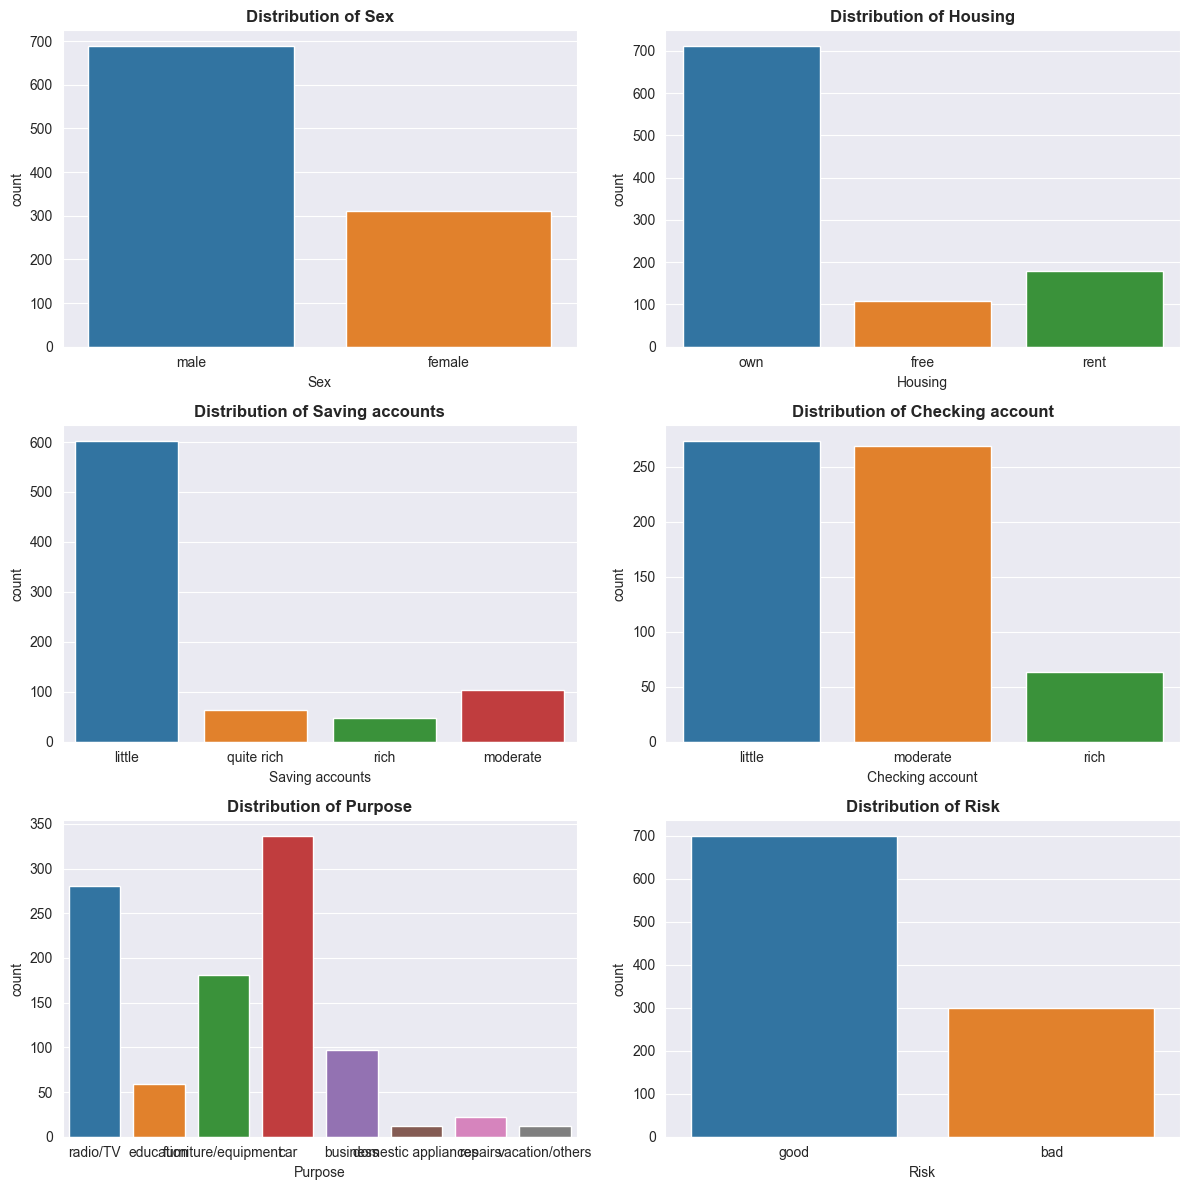

In [11]:
plt.figure(figsize=(12,12))
for index, col in enumerate(cat_features):
    plt.subplot(3,2, index+1)
    sns.countplot(x=col, data=credit_data)
    plt.title(f"Distribution of {col}", fontweight='bold')
plt.tight_layout()

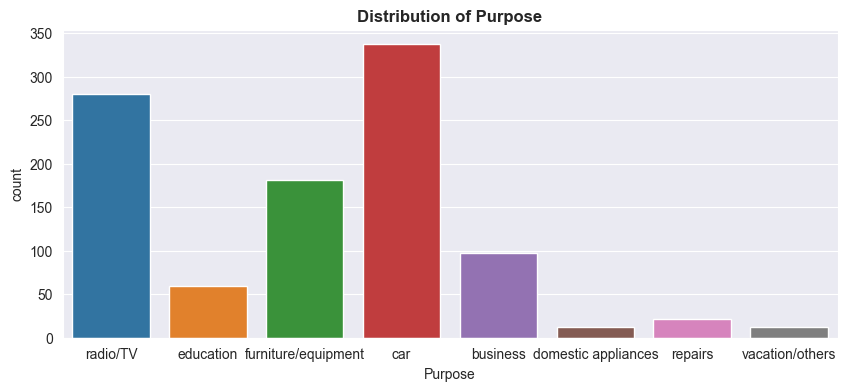

In [12]:
# Purpose
plt.figure(figsize=(10,4))
sns.countplot(x='Purpose', data=credit_data)
plt.title("Distribution of Purpose", fontweight='bold')
plt.show()

<Axes: ylabel='count'>

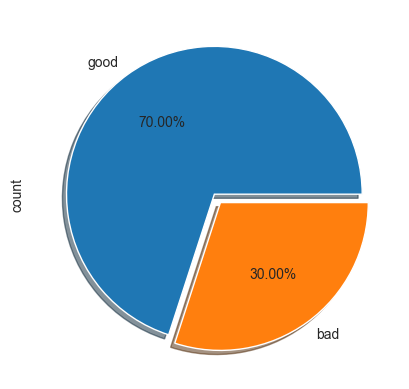

In [13]:
# Target feature
credit_data['Risk'].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True, explode=[0,0.07])

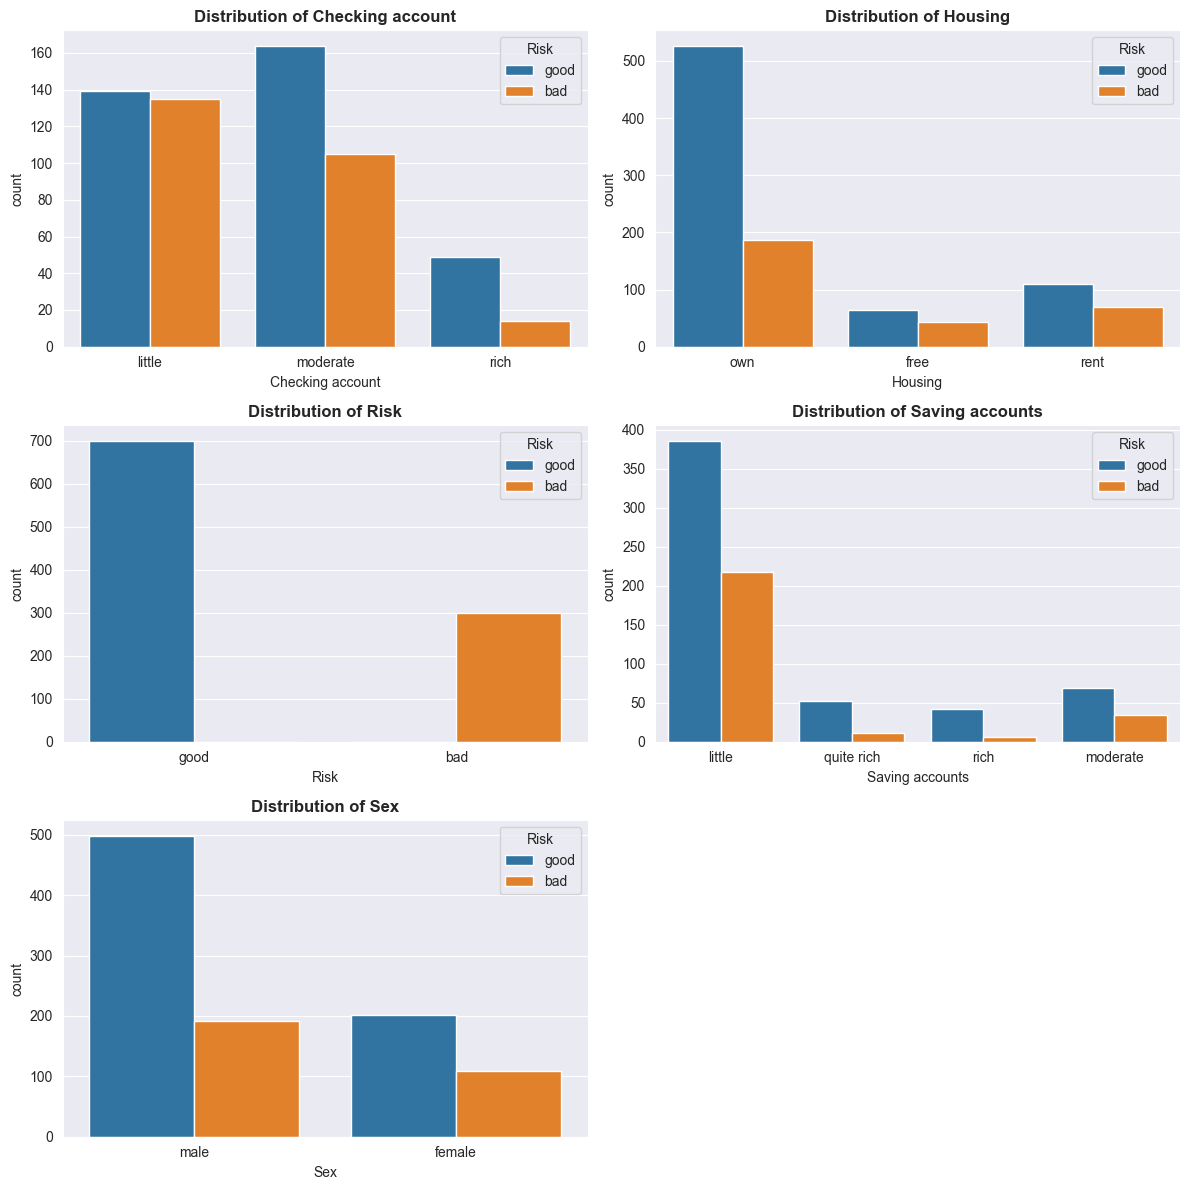

In [14]:
plt.figure(figsize=(12,12))
for index, col in enumerate(cat_features.difference(['Purpose'])):
    plt.subplot(3,2, index+1)
    sns.countplot(x=col, data=credit_data, hue='Risk')
    plt.title(f"Distribution of {col}", fontweight='bold')
plt.tight_layout()

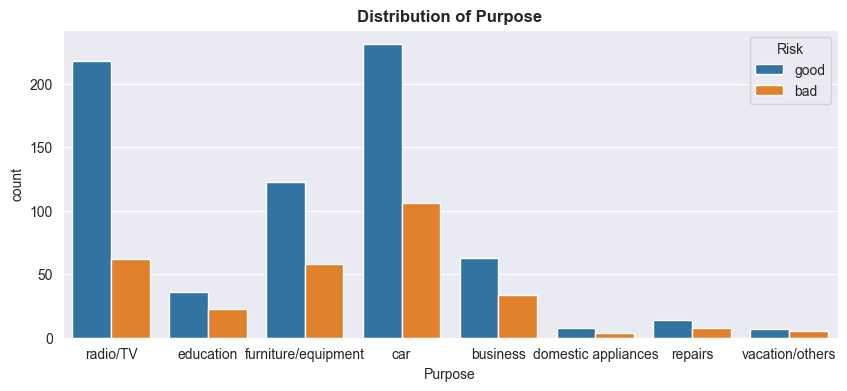

In [15]:
# Purpose
plt.figure(figsize=(10,4))
sns.countplot(x='Purpose', data=credit_data, hue='Risk')
plt.title("Distribution of Purpose", fontweight='bold')
plt.show()

In [16]:
credit_data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [17]:
num_features = num_features.difference(['Unnamed: 0'])

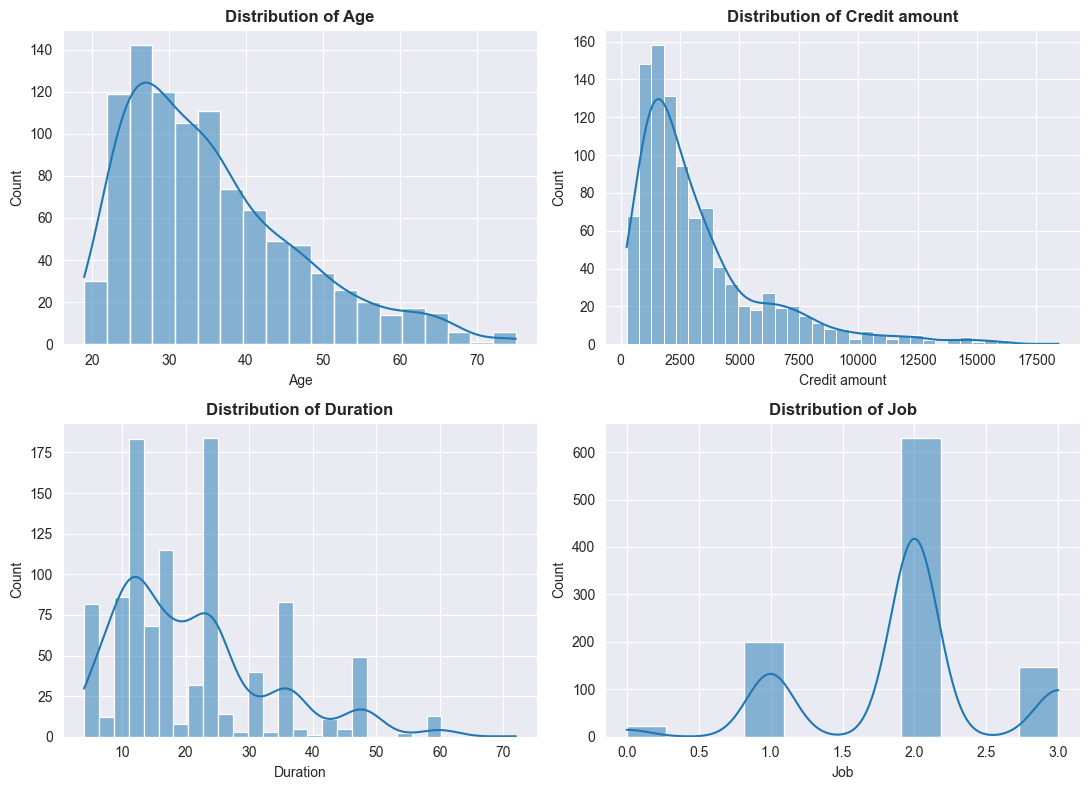

In [18]:
plt.figure(figsize=(11,8))
for index, k in enumerate(num_features):
    plt.subplot(2,2, index+1)
    sns.histplot(x=k, data=credit_data, kde=True)
    plt.title(f"Distribution of {k}", fontweight='bold')
plt.tight_layout()

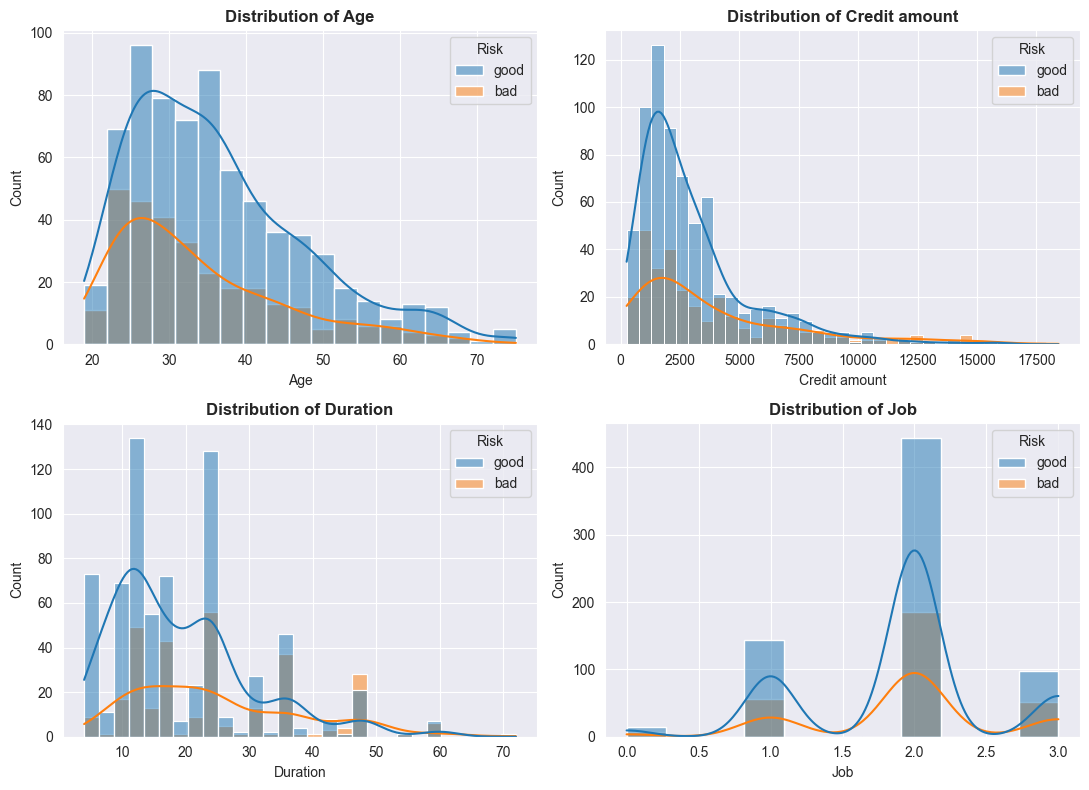

In [19]:
plt.figure(figsize=(11,8))
for index, k in enumerate(num_features):
    plt.subplot(2,2, index+1)
    sns.histplot(x=k, data=credit_data, kde=True, hue='Risk')
    plt.title(f"Distribution of {k}", fontweight='bold')
plt.tight_layout()

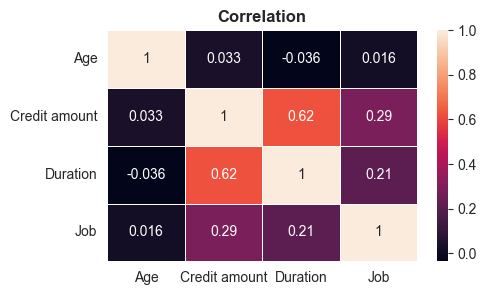

In [20]:
plt.figure(figsize=(5,3))
corr = credit_data[num_features].corr()
sns.heatmap(corr, linewidths=0.5, annot=True)
plt.title('Correlation', fontweight='bold')
plt.show()

In [21]:
credit_data['Purpose'].value_counts()

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

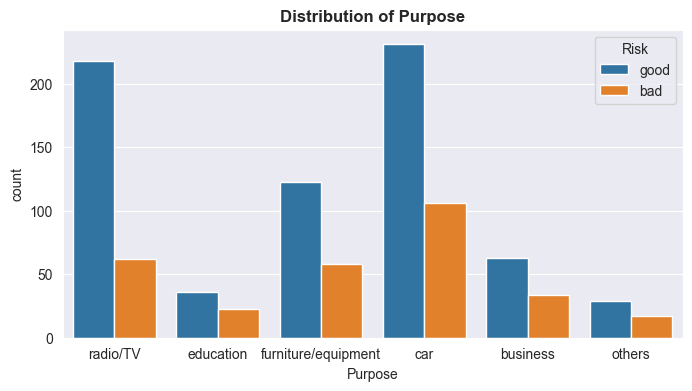

In [22]:
# Grouping the lower frequency classes into 'others'
count = credit_data['Purpose'].value_counts()
threshold =50
rep = count[count <50].index
credit_data['Purpose'] = credit_data['Purpose'].replace(rep, 'others')

plt.figure(figsize=(8,4))
sns.countplot(x='Purpose', data=credit_data, hue='Risk')
plt.title("Distribution of Purpose", fontweight='bold')
plt.show()